In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
import pandas as pd

data_path = '/content/Chat de WhatsApp con FISI BASE 19 🖥📱⌚.csv.txt'

try:
    df = pd.read_csv(data_path, sep=' - ', names=['TEXTO'], engine='python', error_bad_lines=False, quoting=3)
except pd.errors.ParserError as e:
    print(f"Error en línea {e.lineno}: {e.line}")
    raise e

<ipython-input-345-034e65ac83f0>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(data_path, sep=' - ', names=['TEXTO'], engine='python', error_bad_lines=False, quoting=3)
Skipping line 238: Expected 2 fields in line 238, saw 3
Skipping line 245: Expected 2 fields in line 245, saw 3
Skipping line 311: Expected 2 fields in line 311, saw 3
Skipping line 433: Expected 2 fields in line 433, saw 3
Skipping line 519: Expected 2 fields in line 519, saw 3
Skipping line 642: Expected 2 fields in line 642, saw 3
Skipping line 644: Expected 2 fields in line 644, saw 3
Skipping line 659: Expected 2 fields in line 659, saw 3
Skipping line 668: Expected 2 fields in line 668, saw 3
Skipping line 669: Expected 2 fields in line 669, saw 3
Skipping line 715: Expected 2 fields in line 715, saw 3
Skipping line 749: Expected 2 fields in line 749, saw 3
Skipping line 888: Expected 2 fields in line

In [346]:
# Dividir la columna 'Fecha_Mensaje' en 'Fecha' y 'Mensaje'
df[['Fecha', 'Mensaje']] = df['TEXTO'].str.split(': ', 1, expand=True)

# Eliminar la columna 'Fecha_Mensaje' que ya no es necesaria
df.drop(columns='TEXTO', inplace=True)



<ipython-input-346-a7ecae81a351>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Fecha', 'Mensaje']] = df['TEXTO'].str.split(': ', 1, expand=True)


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41032 entries, 2/10/2021, 4:03 p. m. to 27/7/2023, 5:56 p. m.
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fecha    39877 non-null  object
 1   Mensaje  39768 non-null  object
dtypes: object(2)
memory usage: 961.7+ KB


In [348]:
df.head(5)

,Fecha,Mensaje
"2/10/2021, 4:03 p. m.",+51 959 751 613,<Multimedia omitido>
"2/10/2021, 4:03 p. m.",+51 935 574 918,Oe somos hoy rankeds mi kong? O te botas como kk?
"2/10/2021, 4:03 p. m.",+51 935 574 918,<Multimedia omitido>
"2/10/2021, 4:03 p. m.",+51 959 751 613,Cuando uno es famoso se debe botar como kk
"2/10/2021, 4:03 p. m.",+51 959 751 613,Peor


In [349]:
df.describe()

,Fecha,Mensaje
count,39877,39768
unique,297,24826
top,+51 927 062 109,<Multimedia omitido>
freq,3898,8697


In [350]:
# Verifico si hay datos faltantes
print(df.isnull().sum())

Fecha      1155
Mensaje    1264
dtype: int64


In [351]:
df['Fecha'].fillna(method='ffill', inplace=True)

In [352]:
df['Mensaje'].fillna(method='ffill', inplace=True)

In [353]:
# Verifico si hay datos faltantes
print(df.isnull().sum())

Fecha      0
Mensaje    0
dtype: int64


In [354]:
# Dividir la columna 'Fecha_Mensaje' en 'Fecha' y 'Mensaje'
df[['Remitente', 'Hora_remitente']] = df['Fecha'].str.split(', ', 1, expand=True)

# Eliminar la columna 'Fecha_Mensaje' que ya no es necesaria
df.drop(columns='Hora_remitente', inplace=True)



<ipython-input-354-67779b4372c5>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Remitente', 'Hora_remitente']] = df['Fecha'].str.split(', ', 1, expand=True)


In [355]:
df.head()

,Fecha,Mensaje,Remitente
"2/10/2021, 4:03 p. m.",+51 959 751 613,<Multimedia omitido>,+51 959 751 613
"2/10/2021, 4:03 p. m.",+51 935 574 918,Oe somos hoy rankeds mi kong? O te botas como kk?,+51 935 574 918
"2/10/2021, 4:03 p. m.",+51 935 574 918,<Multimedia omitido>,+51 935 574 918
"2/10/2021, 4:03 p. m.",+51 959 751 613,Cuando uno es famoso se debe botar como kk,+51 959 751 613
"2/10/2021, 4:03 p. m.",+51 959 751 613,Peor,+51 959 751 613


import numpy as np
from google.colab import autoviz
df_1175353674863713626 = autoviz.get_df('df_1175353674863713626')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1175353674863713626, *['Fecha'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1175353674863713626 = autoviz.get_df('df_1175353674863713626')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1175353674863713626, *['Mensaje'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1175353674863713626 = autoviz.get_df('df_1175353674863713626')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1175353674863713626, *['Remitente'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1175353674863713626 = autoviz.get_df('df_1175353674863713626')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_1175353674863713626, *['Fecha', 'Mensaje'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1175353674863713626 = autoviz.get_df('df_1175353674863713626')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_1175353674863713626, *['Mensaje', 'Remitente'], **{})
chart

In [356]:
import pandas as pd
from collections import Counter
import re

# Obtener todos los mensajes
all_messages = df['Mensaje'].dropna()

# Concatenar todos los mensajes en un solo texto
all_text = ' '.join(all_messages)

# Utilizar expresiones regulares para extraer hashtags
hashtags = re.findall(r'#\w+', all_text)

# Contar la frecuencia de cada hashtag
hashtag_counts = Counter(hashtags)

# Mostrar los hashtags más frecuentes
print(hashtag_counts.most_common())


[('#TI10', 13), ('#CarnéDeBiblioteca', 5), ('#Comunicado', 5), ('#BalloonWorldCup', 1), ('#GraciasSagasti', 1), ('#RenunciaJeri', 1), ('#votovigilante', 1), ('#server', 1), ('#canelo', 1), ('#humor', 1), ('#3', 1), ('#FreeMakanaky', 1), ('#elijocreer', 1), ('#elijoCreer', 1), ('#Potomahazloposible', 1)]


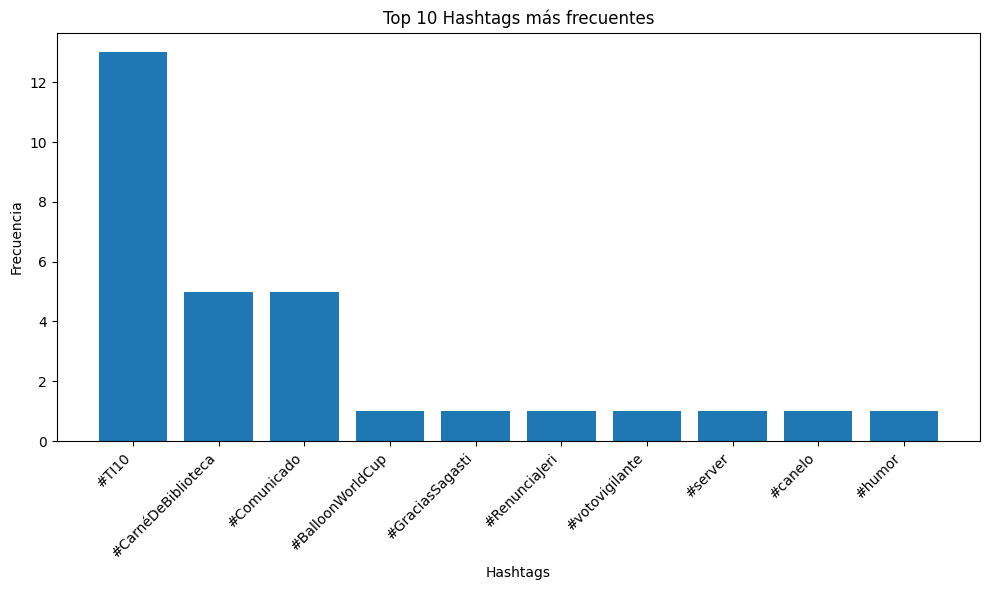

In [357]:
import matplotlib.pyplot as plt

# Obtener todos los mensajes
all_messages = df['Mensaje'].dropna()

# Concatenar todos los mensajes en un solo texto
all_text = ' '.join(all_messages)

# Utilizar expresiones regulares para extraer hashtags
hashtags = re.findall(r'#\w+', all_text)

# Contar la frecuencia de cada hashtag
hashtag_counts = Counter(hashtags)

# Convertir los resultados en un DataFrame para facilitar la visualización
hashtag_df = pd.DataFrame(hashtag_counts.most_common(), columns=['Hashtag', 'Frecuencia'])

# Graficar los 10 hashtags más frecuentes
plt.figure(figsize=(10, 6))
plt.bar(hashtag_df['Hashtag'][:10], hashtag_df['Frecuencia'][:10])
plt.xlabel('Hashtags')
plt.ylabel('Frecuencia')
plt.title('Top 10 Hashtags más frecuentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [358]:
# Contar la cantidad de mensajes por remitente
remitente_counts = df['Remitente'].value_counts()

# Mostrar los remitentes más activos y la cantidad de mensajes enviados
print(remitente_counts)


+51 927 062 109                              3909
+51 938 949 954                              3872
+51 927 447 976                              2389
+51 923 739 367                              2217
+51 957 353 251                              2129
                                             ... 
‎+51 935 514 286 cambió a +51 935 913 794       1
+51 922 145 151                                 1
‎~ Jhenn 🦉 eliminó a +51 943 434 504            1
‎~ Jhenn 🦉 añadió a +51 942 010 955.            1
‎~ Jhenn 🦉 añadió a +51 933 881 582.            1
Name: Remitente, Length: 297, dtype: int64


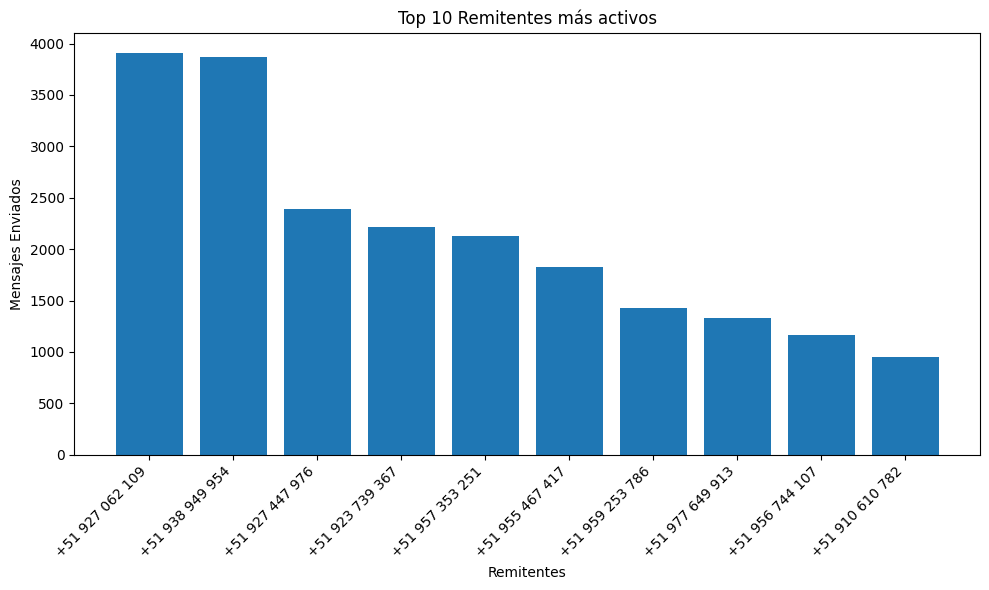

In [359]:
import matplotlib.pyplot as plt

# Contar la cantidad de mensajes por remitente
remitente_counts = df['Remitente'].value_counts()

# Convertir los resultados en un DataFrame para facilitar la visualización
remitente_df = remitente_counts.reset_index()
remitente_df.columns = ['Remitente', 'Mensajes Enviados']

# Graficar los 10 remitentes más activos
plt.figure(figsize=(10, 6))
plt.bar(remitente_df['Remitente'][:10], remitente_df['Mensajes Enviados'][:10])
plt.xlabel('Remitentes')
plt.ylabel('Mensajes Enviados')
plt.title('Top 10 Remitentes más activos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [360]:
import pandas as pd
from textblob import TextBlob


# Función para obtener el sentimiento de un mensaje
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positivo'
    elif sentiment_score < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar la función para obtener el sentimiento de cada mensaje
df['Sentimiento'] = df['Mensaje'].apply(get_sentiment)

# Contar la cantidad de mensajes positivos, negativos y neutros
sentimiento_counts = df['Sentimiento'].value_counts()

# Mostrar los resultados
print(sentimiento_counts)


Neutral     39890
Positivo      658
Negativo      484
Name: Sentimiento, dtype: int64


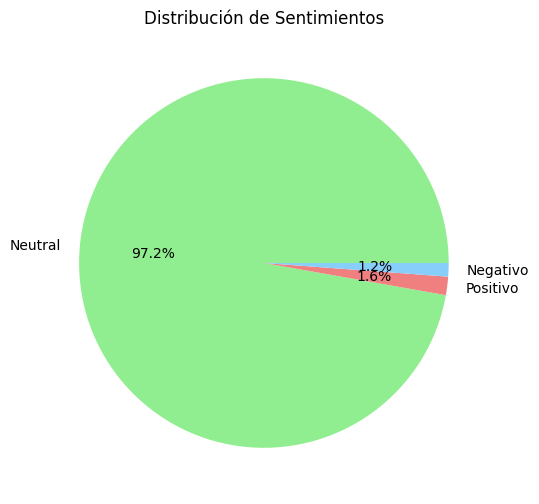

In [361]:
import matplotlib.pyplot as plt

# Aplicar la función para obtener el sentimiento de cada mensaje
df['Sentimiento'] = df['Mensaje'].apply(get_sentiment)

# Contar la cantidad de mensajes positivos, negativos y neutros
sentimiento_counts = df['Sentimiento'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(sentimiento_counts, labels=sentimiento_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribución de Sentimientos')
plt.show()


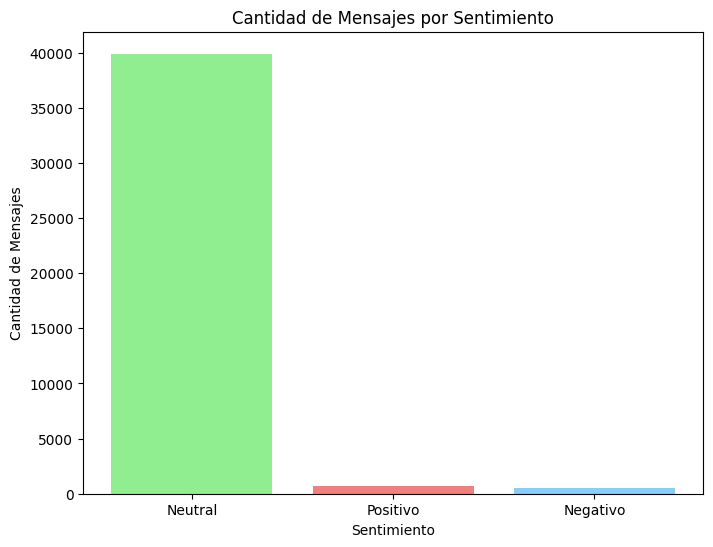

In [362]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(sentimiento_counts.index, sentimiento_counts, color=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Mensajes')
plt.title('Cantidad de Mensajes por Sentimiento')
plt.show()


In [365]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np


# Preprocesamiento de texto
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Mensaje'])
y = df['Sentimiento']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos de clasificación
model_lr = LogisticRegression()
model_svm = SVC()
model_nb = MultinomialNB()
model_rf = RandomForestClassifier()

model_lr.fit(X_train, y_train)
model_svm.fit(X_train, y_train)
model_nb.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Realizar predicciones
pred_lr = model_lr.predict(X_test)
pred_svm = model_svm.predict(X_test)
pred_nb = model_nb.predict(X_test)
pred_rf = model_rf.predict(X_test)

# Ensembling por votación
ensemble_voting = VotingClassifier(estimators=[
    ('lr', model_lr),
    ('svm', model_svm),
    ('nb', model_nb),
    ('rf', model_rf)],
    voting='hard')
ensemble_voting.fit(X_train, y_train)

# Realizar predicciones con el ensemble por votación
pred_ensemble_voting = ensemble_voting.predict(X_test)

# Asignar valores numéricos a las clases de sentimiento
sentimiento_mapping = {'Negativo': 0, 'Neutral': 1, 'Positivo': 2}
y_test_numeric = y_test.map(sentimiento_mapping)

# Convertir las predicciones a valores numéricos
pred_lr_numeric = np.array([sentimiento_mapping[p] for p in pred_lr])
pred_svm_numeric = np.array([sentimiento_mapping[p] for p in pred_svm])
pred_nb_numeric = np.array([sentimiento_mapping[p] for p in pred_nb])
pred_rf_numeric = np.array([sentimiento_mapping[p] for p in pred_rf])

# Ensembling por promedio
pred_ensemble_avg_numeric = (pred_lr_numeric + pred_svm_numeric + pred_nb_numeric + pred_rf_numeric) / 4

# Mostrar los resultados de las predicciones del ensemble por promedio
print("Ensemble por promedio:")
print(pred_ensemble_avg_numeric)


# Mostrar los resultados de las predicciones del ensemble por votación y por promedio
print("Ensemble por votación:")
print(pred_ensemble_voting)



Ensemble por promedio:
[1. 1. 1. ... 1. 1. 1.]
Ensemble por votación:
['Neutral' 'Neutral' 'Neutral' ... 'Neutral' 'Neutral' 'Neutral']


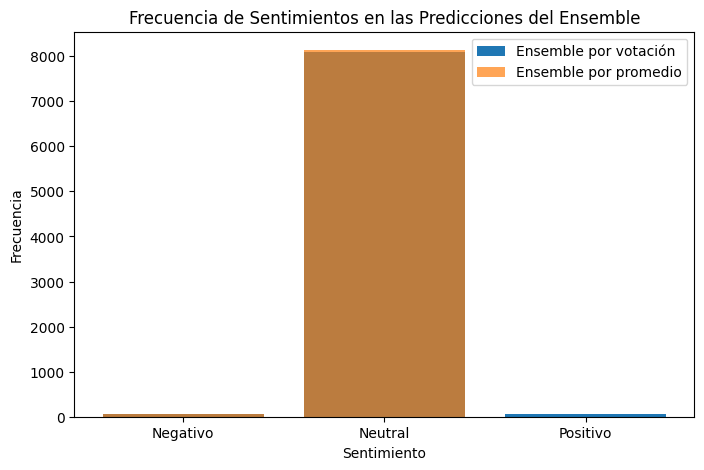

In [371]:
import matplotlib.pyplot as plt
import numpy as np

# Contar la frecuencia de cada clase en las predicciones del ensemble por votación
pred_ensemble_voting_numeric = np.array([sentimiento_mapping[p] for p in pred_ensemble_voting])
pred_ensemble_voting_counts = np.bincount(pred_ensemble_voting_numeric)

# Convertir pred_ensemble_avg_numeric a valores enteros
pred_ensemble_avg_numeric = pred_ensemble_avg_numeric.astype(int)

# Contar la frecuencia de cada clase en las predicciones del ensemble por promedio
pred_ensemble_avg_counts = np.bincount(pred_ensemble_avg_numeric)

# Etiquetas de las clases
sentimiento_labels = ['Negativo', 'Neutral', 'Positivo']

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(sentimiento_labels, pred_ensemble_voting_counts, label='Ensemble por votación')
plt.bar(sentimiento_labels, pred_ensemble_avg_counts, label='Ensemble por promedio', alpha=0.7)
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Sentimientos en las Predicciones del Ensemble')
plt.legend()
plt.show()


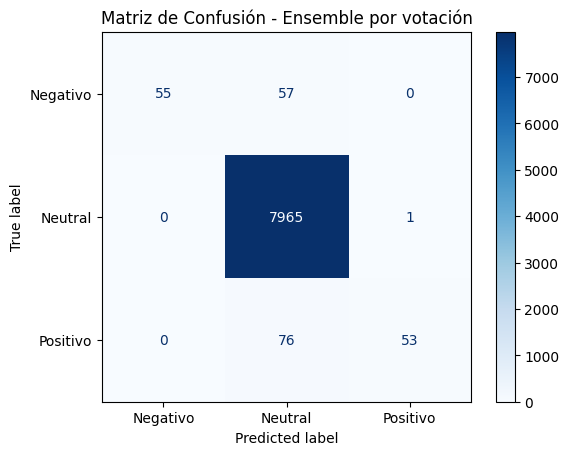

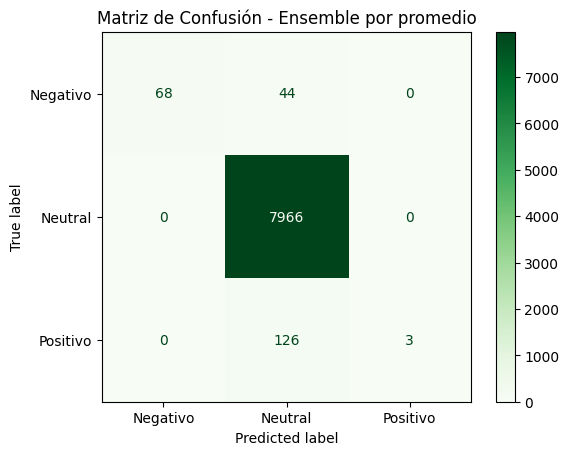

In [372]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convertir las etiquetas reales a valores numéricos
y_test_numeric = y_test.map(sentimiento_mapping)

# Matriz de confusión para las predicciones del ensemble por votación
cm_voting = confusion_matrix(y_test_numeric, pred_ensemble_voting_numeric)

# Matriz de confusión para las predicciones del ensemble por promedio
cm_avg = confusion_matrix(y_test_numeric, pred_ensemble_avg_numeric)

# Crear gráfico de matriz de confusión para el ensemble por votación
disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=sentimiento_labels)
disp_voting.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Ensemble por votación')
plt.show()

# Crear gráfico de matriz de confusión para el ensemble por promedio
disp_avg = ConfusionMatrixDisplay(confusion_matrix=cm_avg, display_labels=sentimiento_labels)
disp_avg.plot(cmap='Greens', values_format='d')
plt.title('Matriz de Confusión - Ensemble por promedio')
plt.show()
